### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

##### Step-1 : Import libraries and dataset.

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
df = pd.read_csv(r"C:\Users\Prathmesh\Downloads\archive\twitter_training.csv")

In [29]:
df.head(3)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [30]:
df.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [31]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [32]:
df.rename(columns = {'Positive':'sentiment','im getting on borderlands and i will murder you all ,':'content','Borderlands':'entity','2401':'tweet_ID'},inplace= True)

In [33]:
df.columns

Index(['tweet_ID', 'entity', 'sentiment', 'content'], dtype='object')

In [34]:
df['sentiment'] = df['sentiment'].astype(str).str.strip()


In [35]:
# Basic cleaning: lowercase, remove NaN
df.dropna(subset=['content', 'sentiment'], inplace=True)
df['content'] = df['content'].str.lower()

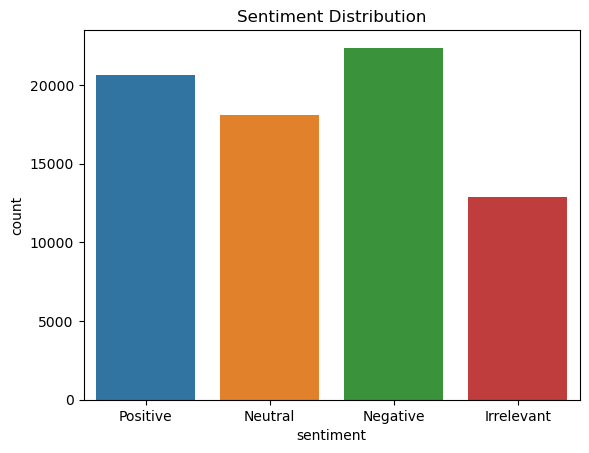

In [36]:
# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

#####  NLP Preprocessing

In [37]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prathmesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Clean tweets
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#", "", text)        # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['content'].apply(clean_text)

##### Word Cloud per Sentiment

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loop through each sentiment
for label in ['positive', 'neutral', 'negative']:
    subset = df[df['sentiment'] == label]
    words = ' '.join(subset['cleaned'].dropna().astype(str))

    if len(words.strip()) == 0:
        print(f"Skipping {label} — no valid words found.")
        continue

    # Generate and display the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud for {label.capitalize()} Sentiment", fontsize=16)
    plt.axis('off')
    plt.show()

Skipping positive — no valid words found.
Skipping neutral — no valid words found.
Skipping negative — no valid words found.


In [40]:
print(df['sentiment'].value_counts())

Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64


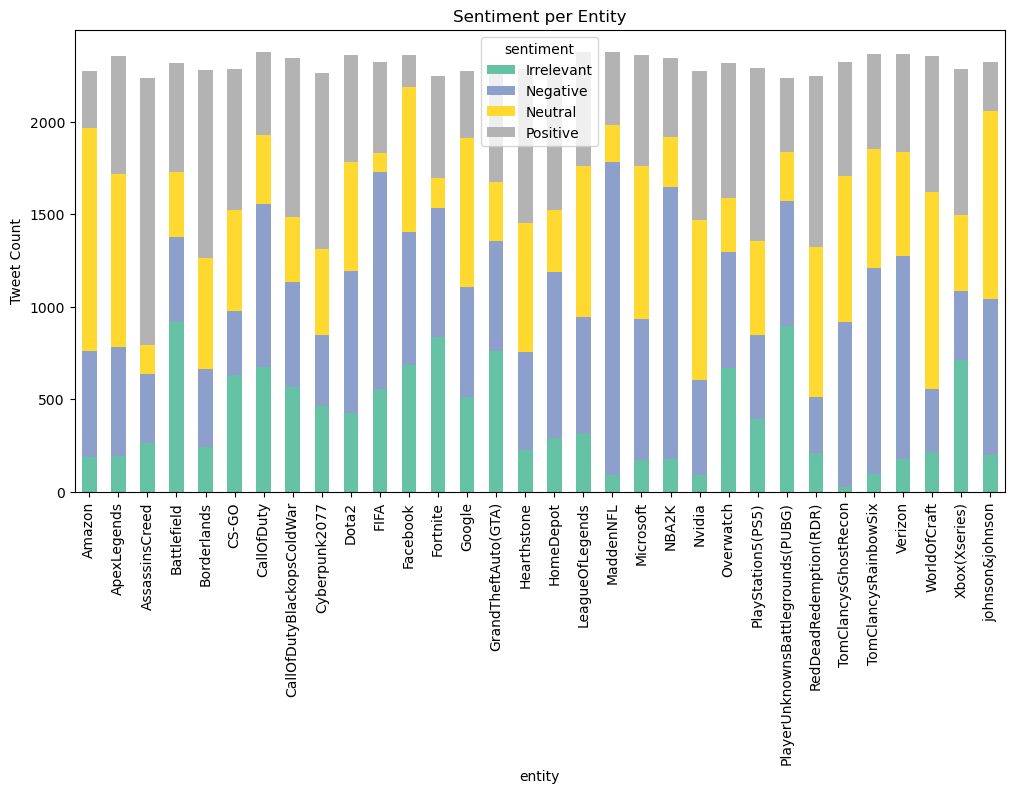

In [44]:
entity_sentiment = df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)
entity_sentiment.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))
plt.title("Sentiment per Entity")
plt.ylabel("Tweet Count")
plt.show()
